In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:\Imarticus Learning\DATASETS\car_price.csv')

In [3]:
df.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df=df.replace({'?':np.nan})

In [5]:
df.isnull().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       203 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [7]:
df['normalized_losses']=df['normalized_losses'].astype(float)

In [8]:
df.normalized_losses.mean()

122.0

In [9]:
df.normalized_losses.fillna(df.normalized_losses.mean(),inplace=True)

In [10]:
df.num_of_doors.value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [11]:
df.num_of_doors.fillna(4,inplace=True)

In [12]:
df.num_of_doors.replace({'four':4,'two':2},inplace=True)

In [13]:
df['num_of_doors']=df['num_of_doors'].astype(float)

In [14]:
df.num_of_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [15]:
df.num_of_cylinders.replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12},inplace=True)

In [16]:
df['bore']=df['bore'].astype(float)

In [17]:
df.bore.mean()

3.3297512437810943

In [18]:
df.bore.fillna(df.bore.mean(),inplace=True)

In [19]:
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak_rpm']=df['peak_rpm'].astype(float)
df['price']=df['price'].astype(float)

In [20]:
df.stroke.fillna(df.stroke.mean(),inplace=True)
df.horsepower.fillna(df.horsepower.mean(),inplace=True)
df.peak_rpm.fillna(df.peak_rpm.mean(),inplace=True)
#df.price.fillna(df.price.mean(),inplace=True)

In [21]:
df=df.dropna()

In [22]:
df.shape

(201, 26)

In [23]:
from sklearn.preprocessing import LabelEncoder # label encoder covert non numeric to number
le=LabelEncoder()

In [24]:
df.Fuel_type=le.fit_transform(df.Fuel_type)
df.make=le.fit_transform(df.make)
df.aspiration=le.fit_transform(df.aspiration)
df.wheel_base=le.fit_transform(df.wheel_base)
df.engine_location=le.fit_transform(df.engine_location)
df.body_style=le.fit_transform(df.body_style)
df.engine_type=le.fit_transform(df.engine_type)
df.fuel_system=le.fit_transform(df.fuel_system)

In [25]:
df['Fuel_type']=df['Fuel_type'].astype(int)
df['make']=df['make'].astype(float)
df['aspiration']=df['aspiration'].astype(float)
df['wheel_base']=df['wheel_base'].astype(float)
df['engine_location']=df['engine_location'].astype(float)
df['body_style']=df['body_style'].astype(float)
df['engine_type']=df['engine_type'].astype(float)
df['fuel_system']=df['fuel_system'].astype(float)

In [90]:
df_x=df.iloc[:,0:-1]

In [92]:
cols=[]
corr=[]
for i in df_x:
    cols.append(i)
    corr.append(df_x[i].corr(df.price))
    

In [93]:
len(cols)

25

In [94]:
len(corr)

25

In [95]:
corr

[-0.1268964294477802,
 0.21078439369964175,
 -0.2373814587847606,
 0.416771547619195,
 0.1476899738125631,
 0.09259582389727344,
 0.574593946005565,
 nan,
 0.667971711442344,
 -0.04326265635121585,
 0.7316241032132996,
 0.7903171314569148,
 0.2580528785410843,
 0.8545731038347579,
 -0.0496107159548964,
 0.4590949131473826,
 0.7501128578438296,
 0.5912854374239989,
 0.504434644052718,
 0.07407552440885043,
 0.19101658332458396,
 0.7220095346364632,
 -0.13988171597728596,
 -0.6707022464573699,
 -0.6858552225231335]

In [96]:
feat_imp=pd.DataFrame()

In [97]:
feat_imp['Features']=cols
feat_imp['Corr']=corr

In [98]:
feat_imp

,Features,Corr
0,symboling,-0.126896
1,normalized_losses,0.210784
2,Fuel_type,-0.237381
3,make,0.416772
4,num_of_doors,0.147690
5,aspiration,0.092596
6,wheel_base,0.574594
7,engine_location,NaN
8,drive_wheels,0.667972
9,body_style,-0.043263


In [99]:
feat_imp[(feat_imp.Corr>0.2) | (feat_imp.Corr<-0.2)]

,Features,Corr
1,normalized_losses,0.210784
2,Fuel_type,-0.237381
3,make,0.416772
6,wheel_base,0.574594
8,drive_wheels,0.667972
10,length,0.731624
11,width,0.790317
12,height,0.258053
13,curb_weight,0.854573
15,num_of_cylinders,0.459095


In [100]:
l1=list(feat_imp[(feat_imp.Corr>0.2) | (feat_imp.Corr<-0.2)].Features)
l1

['normalized_losses',
 'Fuel_type',
 'make',
 'wheel_base',
 'drive_wheels',
 'length',
 'width',
 'height',
 'curb_weight',
 'num_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'horsepower',
 'city_mpg',
 'highway_mpg']

In [101]:
l1.append('price')

In [102]:
l1

['normalized_losses',
 'Fuel_type',
 'make',
 'wheel_base',
 'drive_wheels',
 'length',
 'width',
 'height',
 'curb_weight',
 'num_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'horsepower',
 'city_mpg',
 'highway_mpg',
 'price']

In [104]:
df=df.loc[:,l1]

In [105]:
df

,normalized_losses,Fuel_type,make,wheel_base,drive_wheels,length,width,height,curb_weight,num_of_cylinders,engine_size,fuel_system,bore,horsepower,city_mpg,highway_mpg,price
0,122.0,1,0.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,5.0,3.47,111.0,21,27,13495.0
1,122.0,1,0.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,5.0,3.47,111.0,21,27,16500.0
2,122.0,1,0.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,5.0,2.68,154.0,19,26,16500.0
3,164.0,1,0.0,1.0,99.8,176.6,66.2,54.3,2337,4,109,5.0,3.19,102.0,24,30,13950.0
4,164.0,1,0.0,0.0,99.4,176.6,66.4,54.3,2824,5,136,5.0,3.19,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,1,0.0,2.0,109.1,188.8,68.9,55.5,2952,4,141,5.0,3.78,114.0,23,28,16845.0
201,95.0,1,1.0,2.0,109.1,188.8,68.8,55.5,3049,4,141,5.0,3.78,160.0,19,25,19045.0
202,95.0,1,0.0,2.0,109.1,188.8,68.9,55.5,3012,6,173,5.0,3.58,134.0,18,23,21485.0
203,95.0,0,1.0,2.0,109.1,188.8,68.9,55.5,3217,6,145,3.0,3.01,106.0,26,27,22470.0


In [59]:
df=df1

In [60]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(df,test_size=.2)

In [61]:
train_df_x = df_train.iloc[:,0:-1]# select all x variables
train_df_y = df_train.iloc[:,-1]

In [62]:
test_df_x = df_test.iloc[:,0:-1]# select all x variables
test_df_y = df_test.iloc[:,-1]

In [63]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(train_df_x,train_df_y)

LinearRegression()

In [64]:
Rsquare=linreg.score(train_df_x,train_df_y)

In [65]:
Rsquare

0.8631491512539553

In [66]:
N=train_df_x.shape[0]
K=train_df_x.shape[1]
Adj_Rsqu=1-(1-Rsquare)*(N-1)/(N-K-1)

In [67]:
Adj_Rsqu

0.8353339380941901

In [68]:
pred_train=linreg.predict(train_df_x)
pred_test=linreg.predict(test_df_x)

In [69]:
pred_train

array([14412.13904324, 10427.71154495, 11359.58121835, 17576.81616736,
       17412.73634458,  7771.91231902,  4664.50848782,  8375.35973436,
       13591.61208192,  9373.85374863, 12609.44004736,  8111.14495115,
        7521.01578848,  6151.37612572, 10394.66078272,  7328.67720613,
        7398.90024991, 13702.19779944,  6408.6384905 , 13328.3099631 ,
        8893.91572795, 17380.5595989 ,  8871.19345692,  9139.9616678 ,
        9418.02211565, 18098.46502863,  5734.06697848, 12133.45123309,
       14634.732381  ,  6056.96902589, 11275.76321488,  9785.31833484,
       18639.87051168,  6590.54179303, 19302.70340167,  6018.07641432,
       14558.56565822,  6699.17748924,  6006.15971397,  8386.99762379,
        6170.28788533,  7306.7471903 , 11409.38864975, 18832.06029266,
       19822.38989608, 16390.1678377 ,  9007.30052647, 11571.03437715,
       14443.00947482,  9263.1296203 , 19018.2840818 , 12576.83471373,
       10824.34225235,  8558.74562719,  9849.58517681, 13013.1814194 ,
      

In [70]:
act_pred=pd.DataFrame()
act_pred['Actual']=train_df_y 
act_pred['Pred']=pred_train

In [71]:
act_pred_test=pd.DataFrame()
act_pred_test['Actual']=test_df_y 
act_pred_test['Pred']=pred_test

In [72]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error ,mean_squared_error

In [73]:
mean_squared_error(act_pred['Actual'],act_pred['Pred'])

2935383.2776650805

In [74]:
mean_absolute_error(act_pred['Actual'],act_pred['Pred'])

1326.8816229113813

In [75]:
mean_absolute_percentage_error(act_pred['Actual'],act_pred['Pred'])*100

12.37238483100759

In [76]:
error_train=train_df_y-pred_train


In [77]:
error_train.mean()

-1.1768495201464467e-11

In [78]:
error_test=test_df_y-pred_test


In [79]:
error_test.mean()

500.0863461293204

In [80]:
mse_train=np.mean(np.square(error_train))
mse_test=np.mean(np.square(error_test))
print('mse_train is',mse_train)
print('mse_test is',mse_test)

mse_train is 2935383.2776650805
mse_test is 6811876.996088657


In [81]:
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train',rmse_train)
print('rmse_test',rmse_test)

rmse_train 1713.2960274468276
rmse_test 2609.9572785945475


In [82]:
mape_train=np.mean(np.abs(error_train*100/act_pred['Actual']))
mape_test=np.mean(np.abs(error_test*100/act_pred_test['Actual']))
print('Mape of  train is',mape_train)
print('Mape of  test is',mape_test)

Mape of  train is 12.372384831007592
Mape of  test is 13.797782699624136


In [83]:
mape_train

12.372384831007592

In [84]:
mape_test

13.797782699624136

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

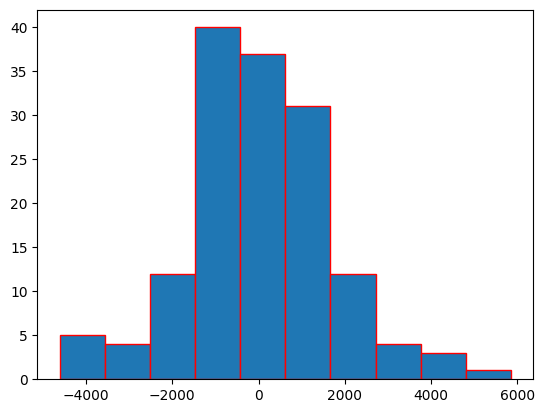

In [86]:
plt.hist(error_train,bins=10,edgecolor='red');

<Axes: xlabel='Actual', ylabel='Pred'>

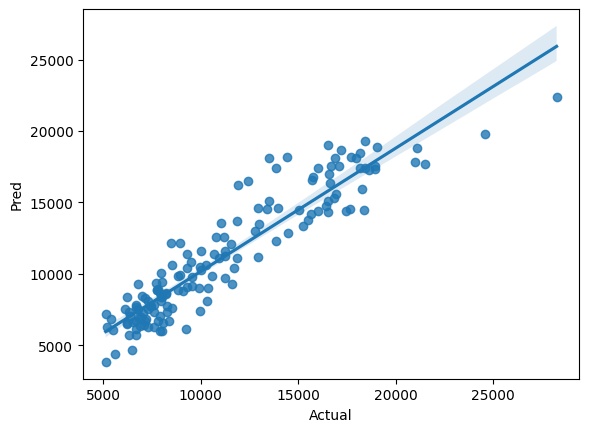

In [87]:
sns.regplot(x='Actual',y='Pred',data=act_pred)

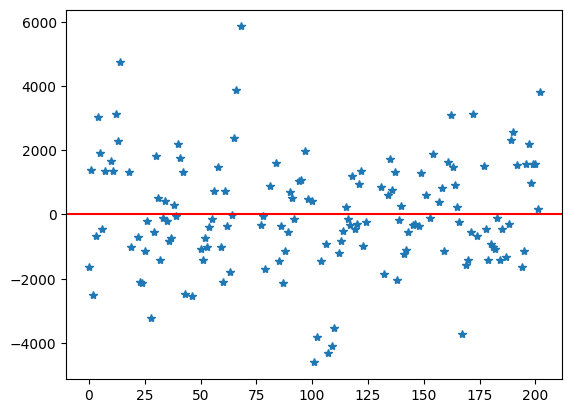

In [88]:
plt.plot(error_train,'*')
plt.axhline(y=0,color='red')

In [57]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list=[x for x in df[col] if (x>mean-k*sd)]
    final_list=[x for x in final_list if (x<mean+k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->",df.shape[0]-df1.shape[0])

In [58]:
remove_outliers(df,'price',2)

(187, 26)
Number of outliers removed--> 14
